<h1>
  <font color="red">
    📊 Ngày 8: Số Liệu Nói Lên Điều Gì?
  </font>
</h1>

Hôm nay, trong ngày thứ tám của hành trình học tập của chúng mình, mình rất vui được đồng hành cùng bạn. Hy vọng rằng, những kiến thức và trải nghiệm mới mà bạn sẽ khám phá hôm nay sẽ mở ra nhiều cơ hội và ý tưởng mới trong cuộc sống.

<img height="400px" width="80%" src="https://digitalcreativemind.com/wp-content/uploads/2021/06/Analytics_amp_Data_Science.gif" />

## Phân Tích Doanh Số Bán Hàng Công Ty

Dữ liệu doanh số bán hàng giống như một cuốn sách lịch sử, ghi chép lại hành trình của mỗi sản phẩm từ khi chào đời đến khi tìm thấy chủ nhân mới. Trong cuốn sách này, mỗi trang, mỗi dòng, mỗi từ đều mang thông tin quý giá về ngày bán, số lượng bán ra, giá bán, và đôi khi là phản hồi từ khách hàng.

In [10]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
doanh_so = pd.read_csv('doanh_so_ban_hang.csv')

# Hiển thị 5 hàng đầu tiên để kiểm tra dữ liệu
print(doanh_so.head())

# Phân tích cơ bản: Tính tổng doanh thu và tổng số lượng sản phẩm bán ra
tong_doanh_thu = doanh_so['Doanh Thu'].sum()
tong_so_luong = doanh_so['So Luong'].sum()

print(f"Tổng doanh thu: {tong_doanh_thu}")
print(f"Tổng số lượng sản phẩm bán ra: {tong_so_luong}")

# Phân tích doanh số bán hàng theo sản phẩm
doanh_thu_san_pham = doanh_so.groupby('San Pham')['Doanh Thu'].sum()
print("Doanh thu theo sản phẩm:")
print(doanh_thu_san_pham)


         Ngày        San Pham  So Luong  Doanh Thu
0  2021-01-01     Cà Phê Việt        10        100
1  2021-01-01       Cà Phê Mỹ         5         75
2  2021-01-02     Cà Phê Việt        15        150
3  2021-01-02   Cà Phê Brazil         7        105
Tổng doanh thu: 430
Tổng số lượng sản phẩm bán ra: 37
Doanh thu theo sản phẩm:
San Pham
 Cà Phê Brazil    105
 Cà Phê Mỹ         75
 Cà Phê Việt      250
Name: Doanh Thu, dtype: int64


## Xử lý dữ liệu:

In [20]:
import pandas as pd
import numpy as np

# Giả sử dữ liệu được lưu trong 'doanh_so_ban_hang.csv'
doanh_so = pd.read_csv('doanh_so_ban_hang.csv')


# Kiểm tra dữ liệu thiếu
print(doanh_so.isnull().sum())


# Xử lý dữ liệu thiếu
doanh_so['Ngày'].fillna(method='ffill', inplace=True) # Điền giá trị thiếu ở cột 'Ngày' bằng giá trị ngày trước đó
doanh_so['Sản Phẩm'].fillna('Thông tin thiếu', inplace=True) # Điền 'Thông tin thiếu' cho Sản Phẩm thiếu
doanh_so['Số Lượng'].replace('-', np.nan, inplace=True) # Chuyển '-' thành NaN
doanh_so['Số Lượng'].fillna(doanh_so['Số Lượng'].median(), inplace=True) # Điền giá trị thiếu bằng trung vị của cột 'Số Lượng'
doanh_so['Doanh Thu'].replace('-', np.nan, inplace=True) # Chuyển '-' thành NaN
doanh_so['Doanh Thu'].fillna(doanh_so['Doanh Thu'].median(), inplace=True) # Điền giá trị thiếu bằng trung vị của cột 'Doanh Thu'


# Loại bỏ cột 'Ghi Chú' nếu không cần thiết
doanh_so.drop('Ghi Chú', axis=1, inplace=True)


# Kiểm tra lại dữ liệu sau khi xử lý
print(doanh_so)

Ngày         1
Sản Phẩm     1
Số Lượng     0
Doanh Thu    0
Ghi Chú      1
dtype: int64
         Ngày         Sản Phẩm Số Lượng Doanh Thu
0  2021-01-01      Cà Phê Việt       10       100
1  2021-01-01        Cà Phê Mỹ     12.5        75
2  2021-01-02  Thông tin thiếu       15       150
3  2021-01-02    Cà Phê Brazil        7     125.0
4  2021-01-02      Cà Phê Việt       20       200


>Trong đoạn code trên, chúng ta sử dụng phương thức fillna() để điền giá trị thiếu, sử dụng replace() để thay thế các giá trị không hợp lệ như '-', và cuối cùng là loại bỏ cột "Ghi Chú" nếu như nó không cần thiết cho phân tích. Điều này giúp dữ liệu của chúng ta trở nên sạch sẽ và đầy đủ hơn, sẵn sàng cho những bước phân tích tiếp theo.


## Phân tích xu hướng trung tâm và phân tán

In [21]:
import pandas as pd


# Tạo DataFrame từ dữ liệu ví dụ
doanh_so = pd.DataFrame({
  'Ngày': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02', '2021-01-03'],
  'Sản Phẩm': ['Cà Phê Việt', 'Cà Phê Mỹ', 'Cà Phê Việt', 'Cà Phê Brazil', 'Cà Phê Việt'],
  'Số Lượng': [10, 5, 15, 7, 20],
  'Doanh Thu': [100, 75, 150, 105, 200]
})


# Tính các thước đo xu hướng trung tâm
trung_binh = doanh_so['Doanh Thu'].mean()
trung_vi = doanh_so['Doanh Thu'].median()


# Tính các thước đo phân tán
pham_vi = doanh_so['Doanh Thu'].max() - doanh_so['Doanh Thu'].min()
phuong_sai = doanh_so['Doanh Thu'].var()
do_lech_chuan = doanh_so['Doanh Thu'].std()


# Hiển thị kết quả
print(f'Trung bình Doanh Thu: {trung_binh}')
print(f'Trung vị Doanh Thu: {trung_vi}')
print(f'Phạm vi Doanh Thu: {pham_vi}')
print(f'Phương sai Doanh Thu: {phuong_sai}')
print(f'Độ lệch chuẩn Doanh Thu: {do_lech_chuan}')


Trung bình Doanh Thu: 126.0
Trung vị Doanh Thu: 105.0
Phạm vi Doanh Thu: 125
Phương sai Doanh Thu: 2442.5
Độ lệch chuẩn Doanh Thu: 49.42165517260627


## Phân Tích Theo Thời Gian và Phân Khúc:

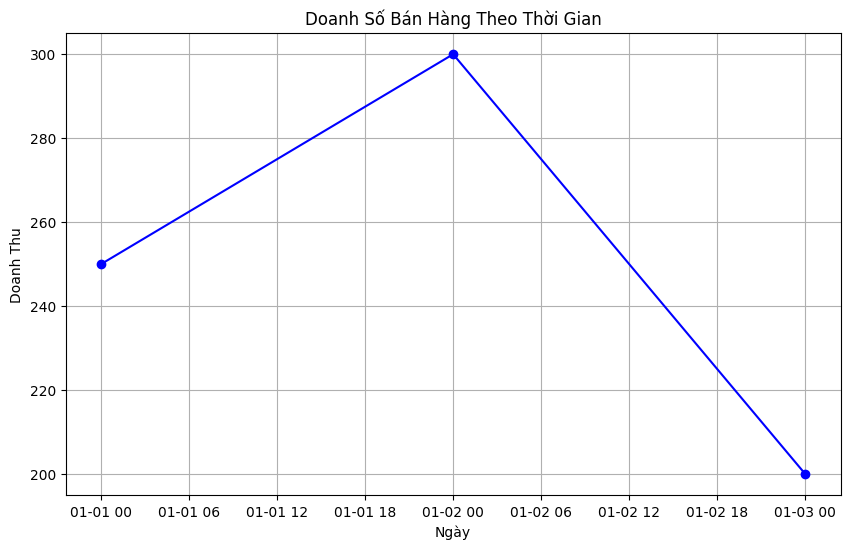

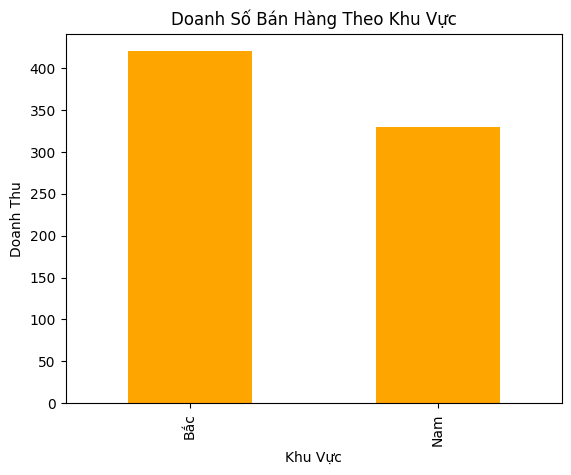

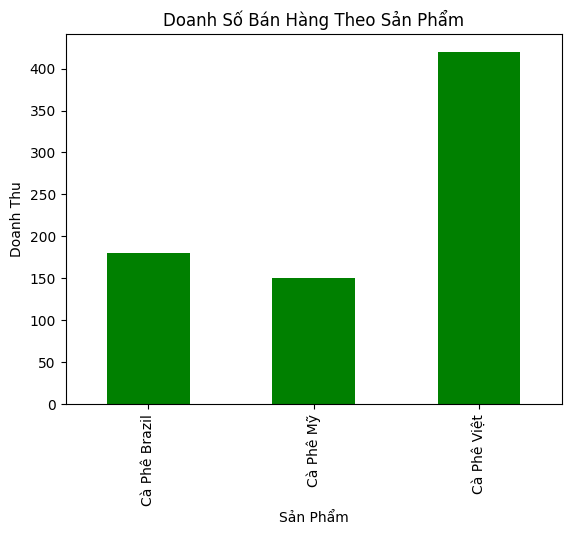

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo DataFrame từ dữ liệu ví dụ
doanh_so = pd.DataFrame({
  'Ngày': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02', '2021-01-03'],
  'Khu Vực': ['Bắc', 'Nam', 'Bắc', 'Nam', 'Bắc'],
  'Sản Phẩm': ['Cà Phê Việt', 'Cà Phê Mỹ', 'Cà Phê Việt', 'Cà Phê Brazil', 'Cà Phê Việt'],
  'Doanh Thu': [100, 150, 120, 180, 200]
})


# Chuyển đổi 'Ngày' sang định dạng datetime
doanh_so['Ngày'] = pd.to_datetime(doanh_so['Ngày'])


# Phân tích theo thời gian
doanh_so_theo_ngay = doanh_so.groupby('Ngày')['Doanh Thu'].sum()


# Phân tích theo phân khúc
doanh_so_theo_khuvuc = doanh_so.groupby('Khu Vực')['Doanh Thu'].sum()
doanh_so_theo_sanpham = doanh_so.groupby('Sản Phẩm')['Doanh Thu'].sum()


# Vẽ biểu đồ doanh số theo thời gian
plt.figure(figsize=(10, 6))
plt.plot(doanh_so_theo_ngay.index, doanh_so_theo_ngay.values, marker='o', linestyle='-', color='b')
plt.title('Doanh Số Bán Hàng Theo Thời Gian')
plt.xlabel('Ngày')
plt.ylabel('Doanh Thu')
plt.grid(True)
plt.show()


# Vẽ biểu đồ doanh số theo khu vực
doanh_so_theo_khuvuc.plot(kind='bar', title='Doanh Số Bán Hàng Theo Khu Vực', color='orange')
plt.xlabel('Khu Vực')
plt.ylabel('Doanh Thu')
plt.show()


# Vẽ biểu đồ doanh số theo sản phẩm
doanh_so_theo_sanpham.plot(kind='bar', title='Doanh Số Bán Hàng Theo Sản Phẩm', color='green')
plt.xlabel('Sản Phẩm')
plt.ylabel('Doanh Thu')
plt.show()